<a href="https://colab.research.google.com/github/amitpuri/openagi-codes/blob/main/notebooks/Extreme_Learning_Machine_ELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hpelm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.3 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn

ELM Accuracy with 10 neurons: 0.93
Neurons: 5, Accuracy: 0.97
Neurons: 10, Accuracy: 1.00
Neurons: 15, Accuracy: 1.00
Neurons: 20, Accuracy: 0.93
Neurons: 25, Accuracy: 1.00
Neurons: 30, Accuracy: 0.97


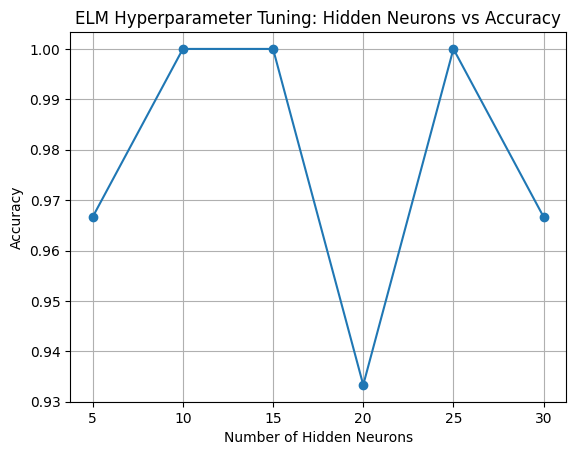

In [ ]:
import hpelm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset
data = load_iris()
X, y = data.data, data.target
num_classes = len(np.unique(y))

# Convert target labels to one-hot encoding (shape: [n_samples, num_classes])
y_onehot = np.eye(num_classes)[y]

# 2. Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train an ELM with a fixed hidden neuron count and evaluate
fixed_neurons = 10
model = hpelm.ELM(X_train_scaled.shape[1], num_classes)
model.add_neurons(fixed_neurons, 'sigm')
model.train(X_train_scaled, y_train, 'c')
pred = model.predict(X_test_scaled)

# Convert predictions to class labels by taking argmax (assumes predictions are one-hot style)
pred_labels = pred.argmax(axis=1) if pred.ndim > 1 else pred
# Convert true one-hot labels back to class indices
true_labels = y_test.argmax(axis=1)
base_acc = accuracy_score(true_labels, pred_labels)
print("ELM Accuracy with {} neurons: {:.2f}".format(fixed_neurons, base_acc))

# 4. Hyperparameter Tuning: Vary the number of hidden neurons
neuron_counts = [5, 10, 15, 20, 25, 30]
accuracies = []
for n in neuron_counts:
    model = hpelm.ELM(X_train_scaled.shape[1], num_classes)
    model.add_neurons(n, 'sigm')
    model.train(X_train_scaled, y_train, 'c')
    pred = model.predict(X_test_scaled)
    pred_labels = pred.argmax(axis=1) if pred.ndim > 1 else pred
    acc = accuracy_score(true_labels, pred_labels)
    accuracies.append(acc)
    print("Neurons: {}, Accuracy: {:.2f}".format(n, acc))

# 5. Plot Hyperparameter Tuning Results
plt.figure()
plt.plot(neuron_counts, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("Accuracy")
plt.title("ELM Hyperparameter Tuning: Hidden Neurons vs Accuracy")
plt.grid(True)
plt.show()
